# NLP applied to judicial decisions parsing

### Ariane ALIX
#### ENS Paris-Saclay, Department of Mathematics

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/MVA/Mallat')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### To disable the automatic scrolling

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Importing the libraries

In [0]:
import os

import numpy as np
import operator
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use("seaborn")
dir_path = os.path.abspath('')
os.chdir(dir_path)

## Importation of the data

### Listing the files

In [6]:
i=0
for file in os.listdir('train_folder_predilex/train_folder/txt_files'):
    print(file)
    i += 1
    if i >= 5:
        break

print('\n')
i=0
for file in os.listdir('test_folder_predilex/test_folder/txt_files'):
    print(file)
    i += 1
    if i >= 5:
        break

Agen_1100752.txt
Agen_100515.txt
Agen_2362.txt
Agen_21229.txt
Agen_21478.txt


Agen_1400036.txt
Agen_400518.txt
Agen_51586.txt
Agen_3436.txt
Agen_60001230.txt


### Loading the files to dataframes

In [0]:
x_train_ids = pd.read_csv('train_folder_predilex/train_folder/x_train_ids.csv',index_col=0)
x_test_ids = pd.read_csv('test_folder_predilex/test_folder/x_test_ids.csv',index_col=0)

#### Preview of the .csv

In [8]:
print('5 first rows')
display(x_train_ids.head(5))
print('Shape:',x_train_ids.shape)

5 first rows


,filename
ID,
0,Agen_100515.txt
1,Agen_1100752.txt
2,Agen_1613.txt
3,Agen_2118.txt
4,Agen_21229.txt


Shape: (770, 1)


### Preview of a .txt file

In [9]:
# Open the file and extract the 10 first lines
f = open("train_folder_predilex/train_folder/txt_files/Agen_100515.txt", "r",encoding="utf-8")
lines=f.readlines()

for line in lines[:25]:
    print(line)

Le : 12/11/2019

 

 

Cour d’appel d’Agen 

 

chambre sociale 

 

Audience publique du 30 avril 2002 

 

N° de RG: 01/00515 

 

 

 

 

REPUBLIQUE FRANCAISE

 

AU NOM DU PEUPLE FRANCAIS

 

ARRET DU 30 AVRIL 2002 ----------------------- 01/00515 ----------------------- Yvon X... Annie X... C/ GROUPE AZUR ASSURANCES IARD CAISSE PRIMAIRE D’ASSURANCE MALADIE DE LOT ET GARONNE Yannick GUGUEN ès qualités de mandataire liquidateur à la liquidation judiciaire de la société des transports MOREL ----------------------- ARRET N° COUR D’APPEL D’AGEN CHAMBRE SOCIALE Prononcé à l’audience publique du trente Avril deux mille deux par Madame LATRABE, Conseiller, La COUR d’APPEL D’AGEN, CHAMBRE SOCIALE, dans l’affaire ENTRE : Monsieur Yvon X... né le 30 Septembre 1955 à TONNEINS (47) Y... du Laurier 47300 BIAS Rep/assistant : Me Pascale LUGUET (avocat au barreau d’AGEN) Madame Annie X... Y... du Laurier 47300 BIAS Rep/assistant : Me Pascale LUGUET (avocat au barreau d’AGEN) APPELANTS d’un jugem

### Formatting the .txt files and storing them

Removing the empty lines, reducing to lower case

In [0]:
docs_train = x_train_ids.copy()
docs_train['text']=None

for file in os.listdir('train_folder_predilex/train_folder/txt_files'):
    f = open("train_folder_predilex/train_folder/txt_files/"+file, "r",encoding="utf-8")
    lines=f.readlines()
    f.close()

    # Remove empty lines and switch to lower case
    i = 0
    while i < len(lines):
        lines[i] = lines[i].lower()
        lines[i] = lines[i].replace('\n',' ')
        lines[i] = lines[i].replace('  ',' ')
        lines[i] = re.sub(r'\s[\-]*\s',' ',lines[i])
        if len(lines[i].strip().replace(" ", "")) == 0:
            lines.pop(i)
            i-=1
        i+=1

    if file ==  'Nouméa_1100172.txt':
      print(file,lines)
    # Store results in DataFrame
    docs_train.loc[docs_train['filename']==file,'text'] = ' '.join(lines)

In [0]:
docs_test = x_test_ids.copy()
docs_test['text']=None

for file in os.listdir('test_folder_predilex/test_folder/txt_files'):
    f = open("test_folder_predilex/test_folder/txt_files/"+file, "r",encoding="utf-8")
    lines=f.readlines()
    f.close()

    # Remove empty lines and switch to lower case
    i = 0
    while i < len(lines):
        lines[i] = lines[i].lower()
        lines[i] = lines[i].replace('\n',' ')
        lines[i] = lines[i].replace('  ',' ')
        lines[i] = re.sub(r'\s[\-]*\s',' ',lines[i])
        if len(lines[i].strip().replace(" ", "")) == 0:
            lines.pop(i)
            i-=1
        i+=1

    # Store results in DataFrame
    docs_test.loc[docs_test['filename']==file,'text'] = ' '.join(lines)

### Loading the target

In [0]:
y_train = pd.read_csv('Y_train_predilex.csv',index_col=0)

sexe_train = y_train['sexe']
date_accident_train = y_train['date_accident']
date_consolidation_train = y_train['date_consolidation']

# Predicting the gender

#### Using the proportions of gendered word

Inspired from the baseline but counting word by word and using those words as features.



## TF-IDF vocabulary
### Example of keywords that help discriminate

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(sublinear_tf=True, min_df = 50, max_df = np.inf, norm='l2', ngram_range=(1, 4), stop_words=None)

features = tfidf.fit_transform(docs_train['text'])


N = 5
features_chi2 = chi2(features, sexe_train=="femme")

indices = np.argsort(features_chi2[0])
feature_names = np.array(tfidf.get_feature_names())[indices]

unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
threegrams = [v for v in feature_names if len(v.split(' ')) == 3]
quadrigrams = [v for v in feature_names if len(v.split(' ')) == 4]

print("For the label Sexe :")
print("\n. Most correlated unigrams:\n  - {}".format('\n  - '.join(unigrams[-N:])))
print("\n. Most correlated bigrams:\n  - {}".format('\n  - '.join(bigrams[-N:])))
print("\n. Most correlated 3-grams:\n  - {}".format('\n  - '.join(threegrams[-N:])))
print("\n. Most correlated 4-grams:\n  - {}".format('\n  - '.join(quadrigrams[-N:])))

For the label Sexe :

. Most correlated unigrams:
  - âgée
  - appelante
  - déboutée
  - mme
  - née

. Most correlated bigrams:
  - mme la
  - appelante madame
  - de mme
  - que mme
  - payer mme

. Most correlated 3-grams:
  - demeurant représentée par
  - alors qu elle
  - dont elle été
  - elle été victime
  - mme la somme

. Most correlated 4-grams:
  - fonds indemnisation des victimes
  - des victimes de amiante
  - demeurant représentée par la
  - dont elle été victime
  - mme la somme de


In [0]:
import re

def count_words(pattern, thestring):
    return re.subn(pattern, '', thestring)[1]

##### Initialization of a dataframe and of words to look at

In [0]:
homme = ['il','né','monsieur','subi(e|es|) par monsieur','monsieur ([a-z. ]*|) a été victime','victime(,|) monsieur',\
         'verser(a|) à monsieur']
femme = ['elle','née','madame','subi(e|es|) par madame','madame ([a-z. ]*|) a été victime','victime(,|) madame',\
         'verser(a|) à madame']

words = ['elle/il','née/né','madame/monsieur','subi par madame/monsieur','madame/monsieur a été victime',\
         'victime madame/monsieur','verser à madame/monsieur']

gender_table = pd.DataFrame(np.zeros((len(docs_train),len(words))),columns=words)

In [16]:
for k,text in enumerate(docs_train['text']):
    for i in range(len(femme)):
        homme_count = 0
        femme_count = 0

        try:
          homme_count += count_words(homme[i],text)
          femme_count += count_words(femme[i],text)
        except:
          pass
            
        # Proportion for each word of its feminine version
        if homme_count+femme_count != 0:
            femme_ratio = femme_count/(homme_count+femme_count)
        else:
            femme_ratio=np.nan
        
        
        gender_table[words[i]][k] = femme_ratio

print('Preview of the table')
display(gender_table.head(5))

Preview of the table


,elle/il,née/né,madame/monsieur,subi par madame/monsieur,madame/monsieur a été victime,victime madame/monsieur,verser à madame/monsieur
0,0.296875,0.166667,0.312500,0.0,0.0,NaN,0.5
1,0.180124,0.333333,0.121622,0.0,NaN,0.0,NaN
2,0.527027,0.222222,0.842105,NaN,NaN,NaN,NaN
3,0.306667,0.150000,0.333333,NaN,NaN,NaN,NaN
4,0.239130,0.315789,0.500000,NaN,NaN,NaN,NaN


#### Statistics

In [17]:
print('Stats of the whole table')
display(gender_table.describe())

print('Stats if women')
stats_women = gender_table[sexe_train=='femme'].describe()
display(stats_women)

print('Stats if men')
stats_men = gender_table[sexe_train=='homme'].describe()
display(stats_men)

Stats of the whole table


,elle/il,née/né,madame/monsieur,subi par madame/monsieur,madame/monsieur a été victime,victime madame/monsieur,verser à madame/monsieur
count,770.000000,770.000000,704.000000,111.000000,47.000000,22.000000,98.000000
mean,0.287151,0.168061,0.461115,0.261261,0.159574,0.318182,0.248980
std,0.101089,0.088018,0.313293,0.436134,0.362755,0.476731,0.425779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215530,0.105263,0.151136,0.000000,0.000000,0.000000,0.000000
50%,0.280702,0.166667,0.466667,0.000000,0.000000,0.000000,0.000000
75%,0.353590,0.230769,0.727273,0.750000,0.000000,1.000000,0.475000
max,0.650000,0.411765,1.000000,1.000000,1.000000,1.000000,1.000000


Stats if women


,elle/il,née/né,madame/monsieur,subi par madame/monsieur,madame/monsieur a été victime,victime madame/monsieur,verser à madame/monsieur
count,206.000000,206.000000,187.000000,22.000000,7.000000,6.0,22.000000
mean,0.342580,0.203425,0.714135,0.977273,0.928571,1.0,0.909091
std,0.104603,0.084090,0.247816,0.106600,0.188982,0.0,0.294245
min,0.055556,0.000000,0.000000,0.500000,0.500000,1.0,0.000000
25%,0.273094,0.144180,0.603571,1.000000,1.000000,1.0,1.000000
50%,0.333333,0.206389,0.777778,1.000000,1.000000,1.0,1.000000
75%,0.413327,0.265156,0.900000,1.000000,1.000000,1.0,1.000000
max,0.650000,0.411765,1.000000,1.000000,1.000000,1.0,1.000000


Stats if men


,elle/il,née/né,madame/monsieur,subi par madame/monsieur,madame/monsieur a été victime,victime madame/monsieur,verser à madame/monsieur
count,559.000000,559.000000,515.000000,88.000000,40.000000,16.0000,76.000000
mean,0.266406,0.155274,0.368735,0.073864,0.025000,0.0625,0.057895
std,0.091815,0.085791,0.283002,0.257528,0.158114,0.2500,0.213081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,0.202848,0.100000,0.107625,0.000000,0.000000,0.0000,0.000000
50%,0.263566,0.153846,0.333333,0.000000,0.000000,0.0000,0.000000
75%,0.328552,0.210526,0.666667,0.000000,0.000000,0.0000,0.000000
max,0.559140,0.409091,1.000000,1.000000,1.000000,1.0000,1.000000


#### Replace the NaN by the average of the two means per gender 
(to avoid bias if we put normal global mean)

In [0]:
gender_table['madame/monsieur']=gender_table['madame/monsieur'].fillna(0.5*stats_women.loc['mean']['madame/monsieur']+0.5*stats_men.loc['mean']['madame/monsieur'])
gender_table['subi par madame/monsieur']=gender_table['subi par madame/monsieur'].fillna(0.5*stats_women.loc['mean']['subi par madame/monsieur']+0.5*stats_men.loc['mean']['subi par madame/monsieur'])
gender_table['madame/monsieur a été victime']=gender_table['madame/monsieur a été victime'].fillna(0.5*stats_women.loc['mean']['madame/monsieur a été victime']+0.5*stats_men.loc['mean']['madame/monsieur a été victime'])
gender_table['victime madame/monsieur']=gender_table['victime madame/monsieur'].fillna(0.5*stats_women.loc['mean']['victime madame/monsieur']+0.5*stats_men.loc['mean']['victime madame/monsieur'])
gender_table['verser à madame/monsieur']=gender_table['verser à madame/monsieur'].fillna(0.5*stats_women.loc['mean']['verser à madame/monsieur']+0.5*stats_men.loc['mean']['verser à madame/monsieur'])

### Prediction with an SGD classifier

In [0]:
import time

In [20]:
!pip3 install pactools

     |████████████████████████████████| 71kB 5.0MB/s 
  Created wheel for pactools: filename=pactools-0.2.0b0-cp36-none-any.whl size=81682 sha256=85d57467d737bd6850362e3360cb38d6d35f484717ece2aab2dfd29f4b3f1c75
  Stored in directory: /root/.cache/pip/wheels/5b/a6/57/f1df50567735175243e07792baced6076d67ab30ca1c138b71
Successfully built pactools


In [0]:
import sklearn
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar

In [22]:
features = tfidf.fit_transform(docs_train['text'])

### GridSearch on the parameters of the classifier

start = time.time()

parameters = {'loss': ['log','hinge','squared_hinge'],\
              'penalty': ['l1'],\
              'max_iter':[1000],\
              'epsilon': [0.0001,0.001,0.01],\
              'class_weight':[None],\
              'random_state':np.arange(0,20)}

clf = GridSearchCVProgressBar(sklearn.linear_model.SGDClassifier(), parameters, n_jobs=-1, verbose=1,cv=5)

# find best parameters
clf.fit(features, sexe_train)
print('Best parameters:',clf.best_params_)


### ----------------------
# SGD with best parameters
sgd = sklearn.linear_model.SGDClassifier()
sgd.set_params(**clf.best_params_)

sgd.fit(features, sexe_train)
print('Score on training set: ' + str(round(100*sgd.score(features, sexe_train),2)) + "%\n")

end = time.time()
print("Training time: " + str(end-start))

sexe_train_pred = sgd.predict(features)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  4.4min finished


Best parameters: {'class_weight': None, 'epsilon': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1', 'random_state': 18}
Score on training set: 98.18%

Training time: 262.79838967323303


### Prediction

In [0]:
features_test = tfidf.transform(docs_test['text'])
sexe_pred = sgd.predict(features_test)

# Prediction of the accident and consolidation dates

### Keeping sentences as format

In [0]:
docs_train_sentences = {}

for file in os.listdir('train_folder_predilex/train_folder/txt_files'):
    f = open("train_folder_predilex/train_folder/txt_files/"+file, "r",encoding="utf-8")
    lines=f.readlines()
    f.close()

    # Remove empty lines and switch to lower case
    i = 0
    while i < len(lines):
        lines[i] = lines[i].lower()
        lines[i] = lines[i].replace('\n',' ')
        lines[i] = lines[i].replace('\xa0','')
        lines[i] = lines[i].replace('  ',' ')
        lines[i] = re.sub(r'\s[\-]*\s',' ',lines[i])
        if len(lines[i].strip().replace(" ", "")) == 0:
            lines.pop(i)
            i-=1
        i+=1
    
    # Index of the file
    ind  = x_train_ids[x_train_ids['filename']==file].index[0]
    
    # Store results in dict
    docs_train_sentences[ind] = lines

In [0]:
docs_test_sentences = {}

for file in os.listdir('test_folder_predilex/test_folder/txt_files'):
    f = open("test_folder_predilex/test_folder/txt_files/"+file, "r",encoding="utf-8")
    lines=f.readlines()
    f.close()

    # Remove empty lines and switch to lower case
    i = 0
    while i < len(lines):
        lines[i] = lines[i].lower()
        lines[i] = lines[i].replace('\n',' ')
        lines[i] = lines[i].replace('\xa0','')
        lines[i] = lines[i].replace('  ',' ')
        lines[i] = re.sub(r'\s[\-]*\s',' ',lines[i])
        if len(lines[i].strip().replace(" ", "")) == 0:
            lines.pop(i)
            i-=1
        i+=1
    
    # Index of the file
    ind  = x_test_ids[x_test_ids['filename']==file].index[0]
    
    # Store results in dict
    docs_test_sentences[ind] = lines

## Extraction of the dates

In [0]:
correct_months = ['janvier','fevrier','février','mars','avril','mai','juin','juillet','aout','août',\
                 'septembre','octobre','novembre','decembre','décembre',\
                 '1','01','2','02','3','03','4','04','5','05','6','06','7','07','8','08','9','09','10','11','12']

month_to_number = {'janvier':'01','fevrier':'02','février':'02','mars':'03','avril':'04','mai':'05','juin':'06','juillet':'07',\
                   'aout':'08','août':'08','septembre':'09','octobre':'10','novembre':'11','decembre':'12','décembre':'12'}


def find_dates(text):
    ### -----------------------------------
    # Find substring matching dates formats
    
    # Patterns used to find dates
    patterns = []
    
    pattern_1 = r"([0-9]{1}|[0-9°]{2}|[0-9er]{3})(\s|)\-(\s|)([0-9]{1}|[0-9]{2})(\s|)\-(\s|)([0-9]{2}|[0-9]{4})(\s|,|;|\.|\-|\))"
    pattern_2 = r"([0-9]{1}|[0-9°]{2}|[0-9er]{3})(\s|)/(\s|)([0-9]{1}|[0-9]{2})(\s|)/(\s|)([0-9]{2}|[0-9]{4})(\s|,|;|\.|\-|\))"
    pattern_3 = r"([0-9]{1}|[0-9°]{2}|[0-9er]{3})(\s|)\.(\s|)([0-9]{1}|[0-9]{2})(\s|)\.(\s|)([0-9]{2}|[0-9]{4})(\s|,|;|\.|\-|\))"
    pattern_4 = r"([0-9]{1}|[0-9°]{2}|[0-9er]{3})\s(\s|)([0-9]{1}|[0-9]{2})\s(\s|)([0-9]{2}|[0-9]{4})(\s|,|;|\.|\-|\))"
    pattern_5 = r"([0-9]{1}|[0-9°]{2}|[0-9er]{3})\s(\s|)([a-zéû\.]{3}|[a-zéû\.]{4}|[a-zéû\.]{5}|[a-zéû\.]{7}|[a-zéû\.]{8}|[a-zéû\.]{9})\s(\s|)([0-9]{2}|[0-9]{4})(\s|,|;|\.|\-|\))"
    pattern_6 = r"(en|courant|durant|au cours de)\s(\s|)([a-zéû\.]{3}|[a-zéû\.]{4}|[a-zéû\.]{5}|[a-zéû\.]{7}|[a-zéû\.]{8}|[a-zéû\.]{9})\s(\s|)([0-9]{2}|[0-9]{4})(\s|,|;|\.|\-|\))" # special case when day not given
    
    dates = []
    subsentences = []
    
    # Look for matches and store them
    it = re.finditer(pattern_1+'|'+pattern_2+'|'+pattern_3+'|'+pattern_4+'|'+pattern_5+'|'+pattern_6, text)
    for match in it:
        start = max(match.start(0)-160,0)
        end = min(match.end(0)+160,len(text))
        
        s = text[start:match.start(0)] + 'date ' + text[match.end(0):end]
        
        if start==0 and end==len(text):
            subsentences.append(' '.join(s.split(' ')))
        elif start==0:
            subsentences.append(' '.join(s.split(' ')[:-1]))
        elif end==len(text):
            subsentences.append(' '.join(s.split(' ')[1:]))
        else:
            subsentences.append(' '.join(s.split(' ')[1:-1]))
            
        dates.append(match.group(0)[:-1])
    
    
    ### -------------------------------
    # Filter matches that are not dates 
    # and eformat dates like in results
    dates_2 = dates.copy()
    i = 0
    while i < len(dates):
        already_popped = False
        try:
            [day, month , year] = re.findall(r"[\w']+", dates[i])
        except:
            dates.pop(i)
            subsentences.pop(i)
            i -= 1 
            already_popped = True
        
        if day in ['1er','1°']:
            day = '01'
        
        # If the precise day is not given we take the 1st of the month
        if day in ['en','courant','durant','au cours de']:
            day = '01'
            
        ### -----------------
        # Check if not a date
        try:
            day_int = int(day)
        except:
            day_int = -1  
            if not already_popped:
                dates.pop(i)
                subsentences.pop(i)
                i -= 1
                already_popped = True

        if month not in correct_months: 
            if not already_popped:
                dates.pop(i)
                subsentences.pop(i)
                i -= 1 
                already_popped = True
            
        if day_int not in range(1,32): 
            if not already_popped:
                dates.pop(i)
                subsentences.pop(i)
                i -= 1   
                already_popped = True
        
        
        ### ----------------
        # Reformat if a date
        if not already_popped: 
            if len(year)==2: # if year with only 2 numbers
                if int(year) > 20: # we assume that we have no date before 1920
                    year = '19' + year
                else:
                    year = '20' + year
                
            if month in month_to_number.keys(): # if month written in letters
                month = month_to_number[month]
                
            if len(day)==1: # if day without 0 before
                day = '0' + day
                
            
            dates[i] = year+'-'+month+'-'+day
       
        i+=1
        
    return dates, subsentences


## Get dates and sentences they are extracted from

In [0]:
dates_train = []
dates_sentences_train = [] # Store the sentences where we found dates
dates_subsentences_train = [] # Store the subsentences around the extracted dates
train_subsentences_ids = [] # Store the ids of the docs the sentences are extracted from

for i in x_train_ids.index:
    # Storing all dates for each doc
    dates_doc = []
    dates_sentences_doc = []
    dates_subsentences_doc = []
    
    # Looking at each sentences of the doc
    for sentence in docs_train_sentences[i]:
        dates, subsentences = find_dates(sentence)  
        
        n = len(dates)
        
        if n>0:
            dates_doc.append(dates)
            dates_sentences_doc.append(sentence)
            dates_subsentences_doc.append(subsentences)
            
            for k in range(len(subsentences)):
                train_subsentences_ids.append(i)
    
    dates_train.append(dates_doc)
    dates_sentences_train.append(dates_sentences_doc)
    dates_subsentences_train.append(dates_subsentences_doc)
    
    
    
dates_test = []
dates_sentences_test = [] # Store the sentences where we found dates
dates_subsentences_test = [] # Store the subsentences around the extracted dates
test_subsentences_ids = [] # Store the ids of the docs the sentences are extracted from

for i in x_test_ids.index:
    # Storing all dates for each doc
    dates_doc = []
    dates_sentences_doc = []
    dates_subsentences_doc = []
    
    # Looking at each sentences of the doc
    for sentence in docs_test_sentences[i]:
        dates, subsentences = find_dates(sentence)  
        
        n = len(dates)
        
        if n>0:
            dates_doc.append(dates)
            dates_sentences_doc.append(sentence)
            dates_subsentences_doc.append(subsentences)
            
            for k in range(len(subsentences)):
                test_subsentences_ids.append(i)
    
    dates_test.append(dates_doc)
    dates_sentences_test.append(dates_sentences_doc)
    dates_subsentences_test.append(dates_subsentences_doc)

## Predict if a sentence contains a date of accident/consolidation

### Builds dataset of subsentences with label 1 if it contains the date of accident/consolidation, else 0'

In [0]:
x_train_subsentences_with_dates = []
y_train_contains_accident = []
y_train_contains_consolidation = []


# Iterates on all texts in the training corpus
for i in range(len(dates_subsentences_train)):
    subsentences = dates_subsentences_train[i]
    
    # Iterates on all subsentences with dates of the text
    for j in range(len(subsentences)):
        for k in range(len(subsentences[j])):
            x_train_subsentences_with_dates.append(subsentences[j][k])

            # If the date of accident is among the extracted dates
            if date_accident_train[i] == dates_train[i][j][k]:
                y_train_contains_accident.append(1)
            else:
                y_train_contains_accident.append(0)

            # If the date of consolidation is among the extracted dates
            if date_consolidation_train[i] in dates_train[i][j][k]:
                y_train_contains_consolidation.append(1)
            else:
                y_train_contains_consolidation.append(0)

In [0]:
x_test_subsentences_with_dates = []


# Iterates on all texts in the test corpus
for i in range(len(dates_subsentences_test)):
    subsentences = dates_subsentences_test[i]

    # Iterates on all sentences with dates of the text
    for j in range(len(subsentences)):
        for k in range(len(subsentences[j])):
            x_test_subsentences_with_dates.append(subsentences[j][k])

        

## **Prediction of sentences containing the accident date**

### Importation and data pre-processing


In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Activation
from tensorflow.keras.preprocessing import text
from tensorflow.keras import optimizers

x_train_encoded = [text.one_hot(sentence, n=50000) for sentence in x_train_subsentences_with_dates]
x_test_encoded = [text.one_hot(sentence, n=50000) for sentence in x_test_subsentences_with_dates]


# Splittling in 0.8 for training, 0.2 for validation

x_train = pad_sequences(x_train_encoded)

n = len(x_train)
split = int(0.8*n)

np.random.seed(0)
indices = np.arange(len(x_train))
np.random.shuffle(indices)
indices_train = indices[:split]
indices_val = indices[split:]

x_train_padded_accident = x_train[indices_train]
y_train_padded_accident = np.array(y_train_contains_accident)[indices_train]

x_val_padded_accident = x_train[indices_val]
y_val_padded_accident = np.array(y_train_contains_accident)[indices_val]

x_test_padded = pad_sequences(x_test_encoded)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/tensorflow-1.15.0/python3.6/tensorflow_core/python/keras/backend.py:5747: ResourceWarning: unclosed file <_io.TextIOWrapper name='/root/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))


In [0]:
from sklearn.utils import class_weight

class_weights_accident = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_contains_accident),
                                                 y_train_contains_accident)

In [0]:
sns.set_palette(sns.color_palette("husl", 4))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          1600000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,682,561
Trainable params: 1,682,561
Non-trainable params: 0
_________________________________________________________________
None


Text(0.5, 1.0, 'Validation loss along epochs')

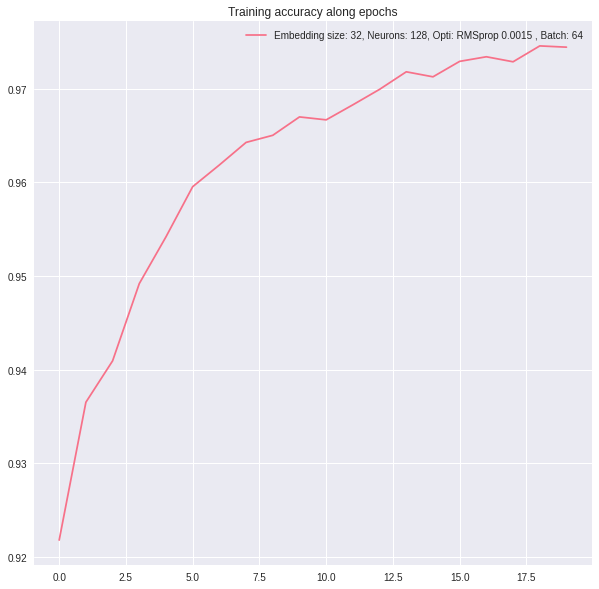

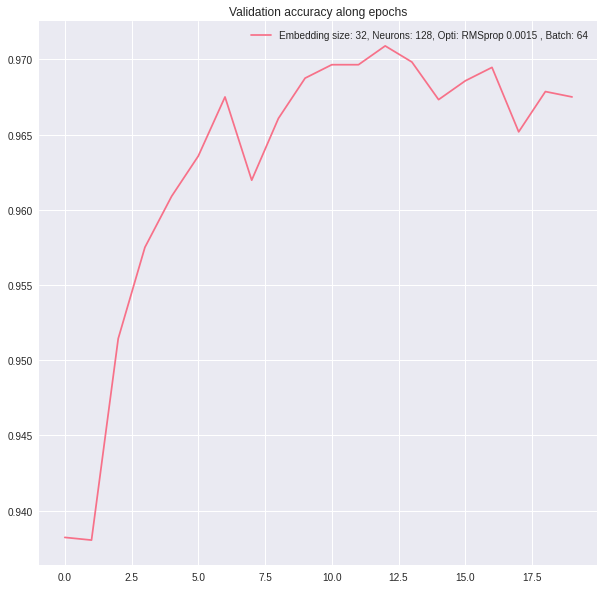

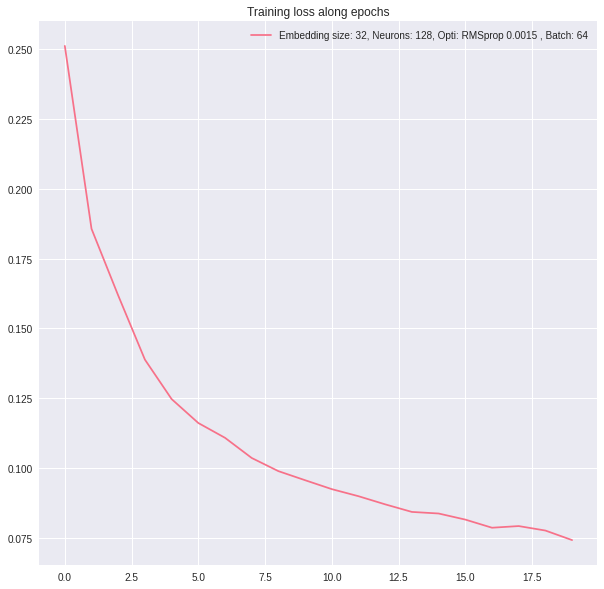

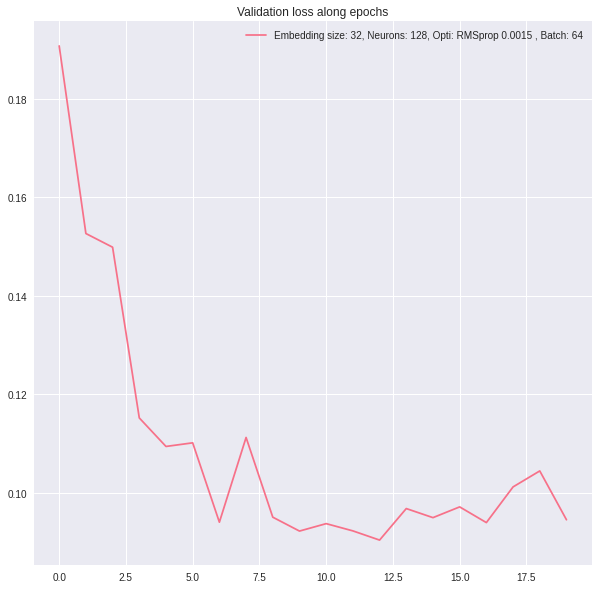

In [33]:
accs = []
val_accs = []
losses = []
val_losses = []
legends = []

best_val_acc = 0

for embed in [32]:
    for n_hid in [128]:
        for batchsize in [64]:
            for opti in [('RMSprop',0.0015)]:

                embed_dim  = embed  # word embedding dimension
                nhid       = n_hid  # number of hidden units in the LSTM
                vocab_size = 50000  # size of the vocabulary
                n_classes  = 1

                model = Sequential()
                model.add(Embedding(vocab_size, embed_dim))
                model.add(LSTM(nhid, dropout=0.5, recurrent_dropout=0.5))
                model.add(Dense(n_classes, activation='sigmoid'))

                opti_name = opti

                if opti[0]=='RMSprop':
                    opti_name = opti[0]+' '+str(opti[1])
                    opti = optimizers.RMSprop(learning_rate=opti[1], rho=0.9)

                # Loss/optimizer/metrics

                loss_classif     =  'binary_crossentropy'
                optimizer        =  opti
                metrics_classif  =  ['binary_accuracy']


                
                model.compile(loss=loss_classif,
                              optimizer=optimizer,
                              metrics=metrics_classif)
                print(model.summary())


                import matplotlib.pyplot as plt

                bs = batchsize
                n_epochs = 20

                history = model.fit(x_train_padded_accident, 
                                    y_train_padded_accident, 
                                    batch_size=bs, 
                                    epochs=n_epochs, 
                                    class_weight=class_weights_accident,
                                    validation_data=(x_val_padded_accident,y_val_padded_accident),
                                    verbose=0)



                ### Plotting the evolution of train/dev results during epochs
                acc = 'binary_accuracy'
                val_acc = 'val_binary_accuracy'

                # Legends
                legends.append("Embedding size: "+str(embed)+', Neurons: '+str(n_hid)+', Opti: '+str(opti_name)+' , Batch: '+str(batchsize))

                # Accuracy
                accs.append(history.history[acc])
                val_accs.append(history.history[val_acc])
              
                # Loss
                losses.append(history.history['loss'])
                val_losses.append(history.history['val_loss'])



# Accuracy
fig = plt.figure(figsize=(10,10))
for i in range(len(accs)):
    plt.plot(accs[i], label=legends[i])
plt.legend()
plt.title("Training accuracy along epochs")

# Val accuracy
fig = plt.figure(figsize=(10,10))
for i in range(len(val_accs)):
    plt.plot(val_accs[i], label=legends[i])
plt.legend()
plt.title("Validation accuracy along epochs")


# Loss
fig = plt.figure(figsize=(10,10))
for i in range(len(losses)):
    plt.plot(losses[i], label=legends[i])
plt.legend()
plt.title("Training loss along epochs")



# Val loss
fig = plt.figure(figsize=(10,10))
for i in range(len(val_losses)):
    plt.plot(val_losses[i], label=legends[i])
plt.legend()
plt.title("Validation loss along epochs")

In [34]:
print('Training accuracy:',accs[-1][-1])
print('Validation accuracy:',val_accs[-1][-1])

Training accuracy: 0.97446084
Validation accuracy: 0.9675


### ROC curve

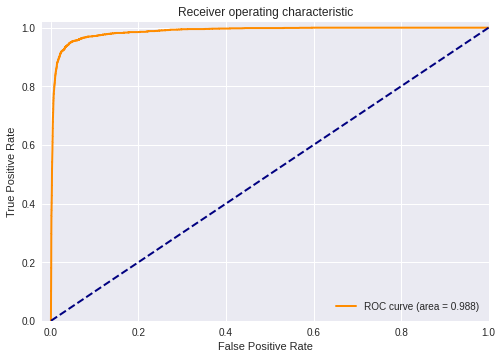

In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


score_roc_accident = model.predict(x_train)

fpr, tpr, _ = roc_curve(y_train_contains_accident, score_roc_accident, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion matrix


Confusion matrix
[[0.98920793 0.01079207]
 [0.15450644 0.84549356]]


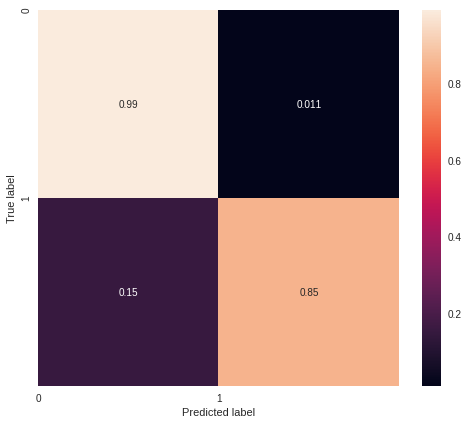

In [37]:
from sklearn.metrics import confusion_matrix

y_pred_accident = (score_roc_accident >= 0.5)

# Confusion matrix between classes
print('\nConfusion matrix')
err_matrix = confusion_matrix(y_train_contains_accident,y_pred_accident)

# Normalize confusion matrix since the classes are unbalanced
err_matrix=err_matrix/np.repeat(np.expand_dims(np.sum(err_matrix,axis=1),axis=1),repeats=2,axis=1)
print(err_matrix)

plt.figure(figsize=(7,6))
#plt.imshow(err_matrix, interpolation='nearest', cmap='gray')
sns.heatmap(err_matrix, annot=True)
plt.xticks([0,1])
plt.yticks([0,1])

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

## Prediction of sentences containing the consolidation date

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Activation
from tensorflow.keras.preprocessing import text
from tensorflow.keras import optimizers

x_train_encoded = [text.one_hot(sentence, n=50000) for sentence in x_train_subsentences_with_dates]
x_test_encoded = [text.one_hot(sentence, n=50000) for sentence in x_test_subsentences_with_dates]


# Splittling in 0.8 for training, 0.2 for validation

x_train = pad_sequences(x_train_encoded)

n = len(x_train)
split = int(0.8*n)

np.random.seed(0)
indices = np.arange(len(x_train))
np.random.shuffle(indices)
indices_train = indices[:split]
indices_val = indices[split:]

x_train_padded_consolidation = x_train[indices_train]
y_train_padded_consolidation = np.array(y_train_contains_consolidation)[indices_train]

x_val_padded_consolidation = x_train[indices_val]
y_val_padded_consolidation = np.array(y_train_contains_consolidation)[indices_val]

x_test_padded = pad_sequences(x_test_encoded)

In [0]:
class_weights_consolidation = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_contains_consolidation),
                                                 y_train_contains_consolidation)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,682,561
Trainable params: 1,682,561
Non-trainable params: 0
_________________________________________________________________
None


Text(0.5, 1.0, 'Validation loss along epochs')

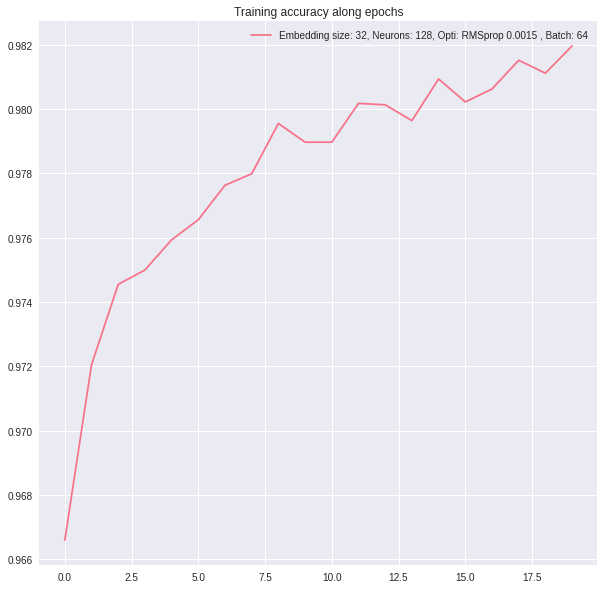

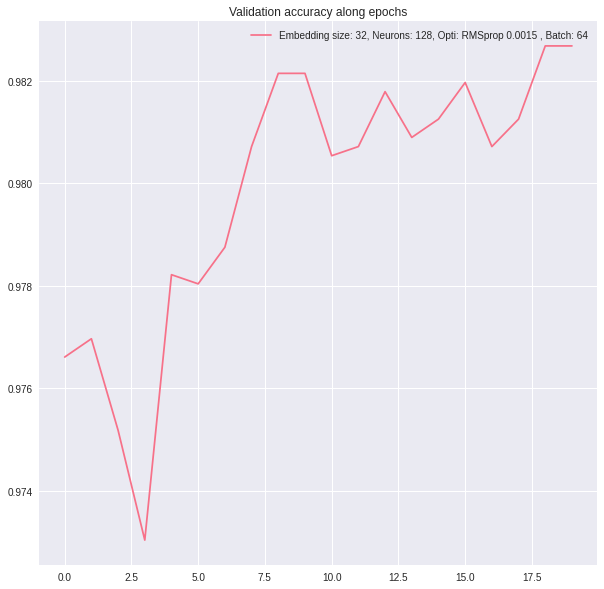

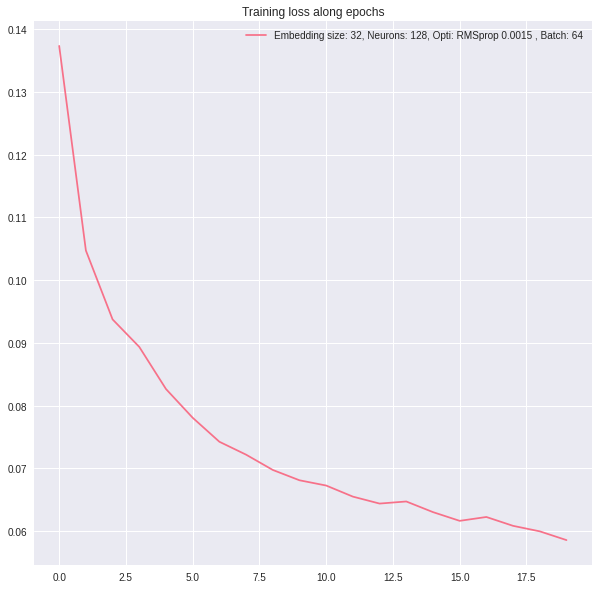

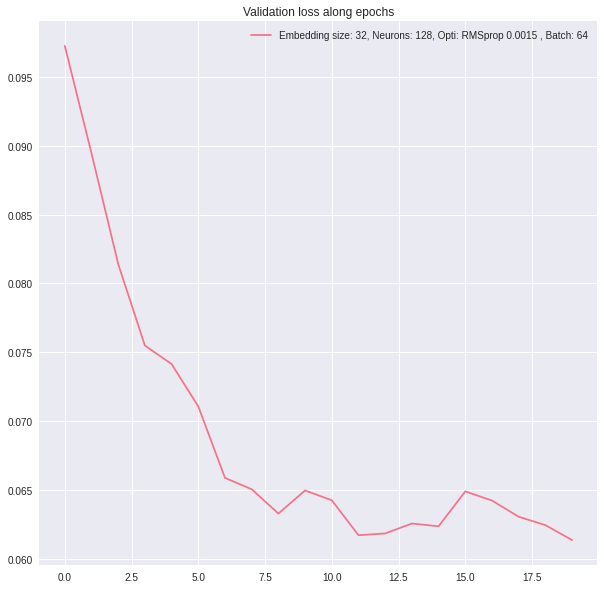

In [41]:
accs = []
val_accs = []
losses = []
val_losses = []
legends = []

for embed in [32]:
    for n_hid in [128]:
        for batchsize in [64]:
            for opti in [('RMSprop',0.0015)]:

                embed_dim  = embed  # word embedding dimension
                nhid       = n_hid  # number of hidden units in the LSTM
                vocab_size = 50000  # size of the vocabulary
                n_classes  = 1

                model2 = Sequential()
                model2.add(Embedding(vocab_size, embed_dim))
                model2.add(LSTM(nhid, dropout=0.5, recurrent_dropout=0.5))
                model2.add(Dense(n_classes, activation='sigmoid'))

                opti_name = opti

                if opti[0]=='RMSprop':
                    opti_name = opti[0]+' '+str(opti[1])
                    opti = optimizers.RMSprop(learning_rate=opti[1], rho=0.9)

                # Loss/optimizer/metrics

                loss_classif     =  'binary_crossentropy'
                optimizer        =  opti
                metrics_classif  =  ['binary_accuracy']


                
                model2.compile(loss=loss_classif,
                              optimizer=optimizer,
                              metrics=metrics_classif)
                print(model2.summary())


                import matplotlib.pyplot as plt

                bs = batchsize
                n_epochs = 20

                history = model2.fit(x_train_padded_consolidation, 
                                    y_train_padded_consolidation, 
                                    batch_size=bs, 
                                    epochs=n_epochs, 
                                    class_weight=class_weights_consolidation,
                                    validation_data=(x_val_padded_consolidation,y_val_padded_consolidation),
                                    verbose=0)



                ### Plotting the evolution of train/dev results during epochs
                acc = 'binary_accuracy'
                val_acc = 'val_binary_accuracy'

                # Legends
                legends.append("Embedding size: "+str(embed)+', Neurons: '+str(n_hid)+', Opti: '+str(opti_name)+' , Batch: '+str(batchsize))

                # Accuracy
                accs.append(history.history[acc])
                val_accs.append(history.history[val_acc])
              
                # Loss
                losses.append(history.history['loss'])
                val_losses.append(history.history['val_loss'])



# Accuracy
fig = plt.figure(figsize=(10,10))
for i in range(len(accs)):
    plt.plot(accs[i], label=legends[i])
plt.legend()
plt.title("Training accuracy along epochs")

# Val accuracy
fig = plt.figure(figsize=(10,10))
for i in range(len(val_accs)):
    plt.plot(val_accs[i], label=legends[i])
plt.legend()
plt.title("Validation accuracy along epochs")


# Loss
fig = plt.figure(figsize=(10,10))
for i in range(len(losses)):
    plt.plot(losses[i], label=legends[i])
plt.legend()
plt.title("Training loss along epochs")



# Val loss
fig = plt.figure(figsize=(10,10))
for i in range(len(val_losses)):
    plt.plot(val_losses[i], label=legends[i])
plt.legend()
plt.title("Validation loss along epochs")

In [42]:
print('Training accuracy:',accs[-1][-1])
print('Validation accuracy:',val_accs[-1][-1])

Training accuracy: 0.98196185
Validation accuracy: 0.9826786


### ROC curve

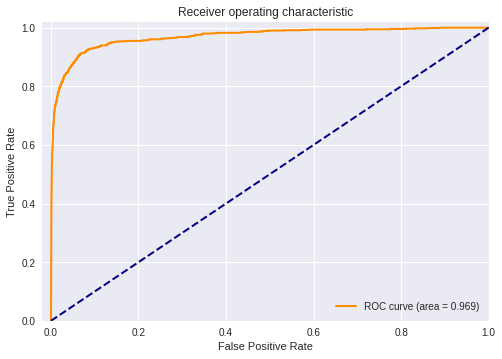

In [43]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


score_roc_consolidation = model2.predict(x_train)

fpr, tpr, _ = roc_curve(y_train_contains_consolidation, score_roc_consolidation, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion matrix


Confusion matrix
[[0.99616094 0.00383906]
 [0.39801544 0.60198456]]


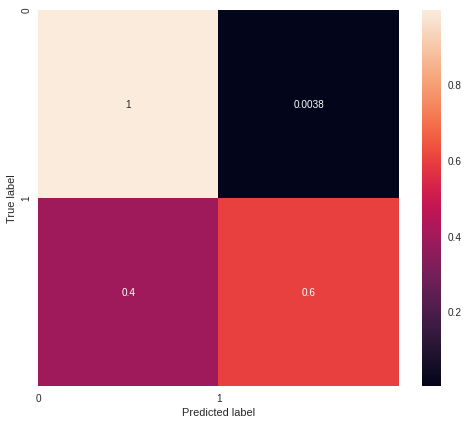

In [44]:
from sklearn.metrics import confusion_matrix

y_pred_consolidation = (score_roc_consolidation >= 0.5)

# Confusion matrix between classes
print('\nConfusion matrix')
err_matrix = confusion_matrix(y_train_contains_consolidation,y_pred_consolidation)

# Normalize confusion matrix since the classes are unbalanced
err_matrix=err_matrix/np.repeat(np.expand_dims(np.sum(err_matrix,axis=1),axis=1),repeats=2,axis=1)
print(err_matrix)

plt.figure(figsize=(7,6))
#plt.imshow(err_matrix, interpolation='nearest', cmap='gray')
sns.heatmap(err_matrix, annot=True)
plt.xticks([0,1])
plt.yticks([0,1])

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

## Predict if dead


In [45]:
### GridSearch on the parameters of the classifier

start = time.time()

parameters = {'loss': ['squared_hinge'],\
              'penalty': ['elasticnet'],\
              'max_iter':[1000],\
              'alpha':[0.005,0.01,0.025],\
              'l1_ratio':[0.75,0.8,0.85],\
              'class_weight':['balanced'],\
              'early_stopping':[True],\
              'random_state':np.arange(0,25)}

clf = GridSearchCVProgressBar(sklearn.linear_model.SGDClassifier(), parameters, n_jobs=-1, verbose=1,cv=5)

# find best parameters
clf.fit(features, date_consolidation_train=='n.a.')
print('Best parameters:',clf.best_params_)


### ----------------------
# SGD with best parameters
sgd_mort = sklearn.linear_model.SGDClassifier()
sgd_mort.set_params(**clf.best_params_)

sgd_mort.fit(features, date_consolidation_train=='n.a.')
print('Score on training set: ' + str(round(100*sgd_mort.score(features, date_consolidation_train=='n.a.'),2)) + "%\n")

end = time.time()
print("Training time: " + str(end-start))

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  1.2min finished


Best parameters: {'alpha': 0.005, 'class_weight': 'balanced', 'early_stopping': True, 'l1_ratio': 0.75, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'elasticnet', 'random_state': 1}
Score on training set: 96.88%

Training time: 71.67446541786194


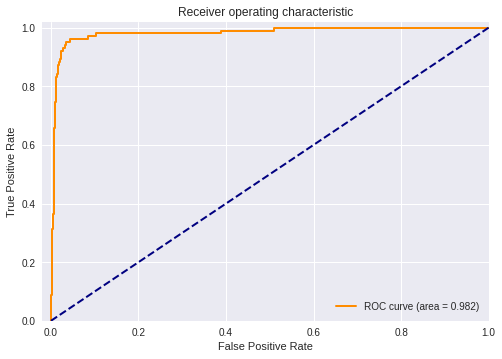

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def sigmoid(x):
    x = x / np.abs(np.max(x))
    return 1 / (1 + np.exp(-x))

score_roc_mort = sigmoid(sgd_mort.decision_function(features))

fpr, tpr, _ = roc_curve(date_consolidation_train=='n.a.', score_roc_mort, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
score_mort = sigmoid(sgd_mort.decision_function(features))

mort_pred = (score_mort >= 0.5)

# Predict dates of accident/consolidation

In [0]:
count_same = 0

pred_accident = []
pred_consolidation = []

for i in x_train_ids.index:
    # Prediction if sentence contains accident/consolidation date for all subsentences of the ith text
    y_pred_accident_text = y_pred_accident[np.array(train_subsentences_ids)==i].ravel()
    y_pred_consolidation_text = y_pred_consolidation[np.array(train_subsentences_ids)==i].ravel()
    score_roc_accident_text = score_roc_accident[np.array(train_subsentences_ids)==i].ravel()
    score_roc_consolidation_text = score_roc_consolidation[np.array(train_subsentences_ids)==i].ravel()
    
    # Dates extracted from the text
    dates = [item for sublist in dates_train[i] for item in sublist]

    # Dates extracted from sentences where we think there is an accident date
    possible_dates_accident = np.array(dates)[y_pred_accident_text]
    
    
    # Dates extracted from sentences where we think there is a consolidation date
    possible_dates_consolidation = np.array(dates)[y_pred_consolidation_text]
    

    # Find the dates appearing the most
    count_date_accident = {}
    for j in range(len(possible_dates_accident)):
        date = possible_dates_accident[j]
        count_date_accident[date] = count_date_accident.get(date,0) + score_roc_accident_text[j]
            
    # Find the dates appearing the most
    count_date_consolidation = {}
    for j in range(len(possible_dates_consolidation)):
        date = possible_dates_consolidation[j]
        count_date_consolidation[date] = count_date_consolidation.get(date,0) + score_roc_consolidation_text[j]
    
    # Predictions
    if count_date_accident!={}:
        ind_max1 = np.argmax(list(count_date_accident.values()))
        pred_accident.append(list(count_date_accident.keys())[ind_max1])
    else:
        pred_accident.append('n.c.')

    
    if count_date_consolidation!={}:
        ind_max2 = np.argmax(list(count_date_consolidation.values()))
        pred_consolidation.append(list(count_date_consolidation.keys())[ind_max2])
    else:
        if mort_pred[i]:
            pred_consolidation.append('n.a.')
        else:
            pred_consolidation.append('n.c.')
    
    """
    print(dates)
    print(possible_dates_accident)
    print(date_accident_train[i])
    print(count_date_accident,count_date_consolidation) 
    break  
    """
    

## Score with custom metric given

In [0]:
def custom_metric_function(dataframe_1, dataframe_2):
    """
        Example of custom metric function.

    Args
        dataframe_1: Pandas Dataframe
            This dataframe was obtained by reading a csv file with following instruction:
            dataframe_1 = pd.read_csv(CSV_1_FILE_PATH, index_col=0, sep=',')

        dataframe_2: Pandas Dataframe
            This dataframe was obtained by reading a csv file with following instruction:
            dataframe_2 = pd.read_csv(CSV_2_FILE_PATH, index_col=0, sep=',')

    Returns
        score: Float
            The metric evaluated with the two dataframes. This must not be NaN.
    """

    score = np.sum(dataframe_1["sexe"]==dataframe_2["sexe"])
    score += np.sum(dataframe_1["date_accident"]==dataframe_2["date_accident"])
    score += np.sum(dataframe_1["date_consolidation"]==dataframe_2["date_consolidation"])
    score /= (3*dataframe_1.shape[0])

    return score

In [50]:

y_train = pd.read_csv('Y_train_predilex.csv')
result_train = pd.DataFrame({'filename':x_train_ids.index,
                       'sexe':sexe_train_pred,
                       'date_accident':pred_accident,
                       'date_consolidation':pred_consolidation},
                        columns=['filename','sexe','date_accident','date_consolidation'])

display(result_train.head(5))
print('Score on training set:',round(custom_metric_function(result_train,y_train),4))

,filename,sexe,date_accident,date_consolidation
0,0,homme,1991-04-09,n.c.
1,1,homme,2005-06-10,2010-01-19
2,2,femme,1997-09-26,n.c.
3,3,femme,1982-08-07,1982-11-07
4,4,homme,1996-11-25,n.c.


Score on training set: 0.9121


# Prediction on test set

In [0]:
score_accident = model.predict(x_test_padded)
score_consolidation = model2.predict(x_test_padded)

sentences_accident_pred = (score_accident >= 0.5)
sentences_consolidation_pred = (score_consolidation >= 0.5)


score_mort_test = sigmoid(sgd_mort.decision_function(features_test))
mort_pred_test = (score_mort_test >= 0.5)

In [0]:
cont=0

accident_pred = []
consolidation_pred = []

for i in x_test_ids.index:
    # Prediction if sentence contains accident/consolidation date for all sentences of the ith text
    sentences_accident_pred_text = sentences_accident_pred[np.array(test_subsentences_ids)==i].ravel()
    sentences_consolidation_pred_text = sentences_consolidation_pred[np.array(test_subsentences_ids)==i].ravel()
    score_accident_text = score_accident[np.array(test_subsentences_ids)==i].ravel()
    score_consolidation_text = score_consolidation[np.array(test_subsentences_ids)==i].ravel()
    
    # Dates extracted from the text
    dates = [item for sublist in dates_test[i-len(dates_train)] for item in sublist]
    
    # Dates extracted from sentences where we think there is an accident date
    possible_dates_accident = np.array(dates)[sentences_accident_pred_text]
    
    # Dates extracted from sentences where we think there is a consolidation date
    possible_dates_consolidation = np.array(dates)[sentences_consolidation_pred_text]
    
    # Find the dates appearing the most
    count_date_accident = {}
    for date in possible_dates_accident:
        count_date_accident[date] = count_date_accident.get(date,0) + 1
            
   
    # Find the dates appearing the most
    count_date_accident = {}
    for j in range(len(possible_dates_accident)):
        date = possible_dates_accident[j]
        count_date_accident[date] = count_date_accident.get(date,0) + score_accident_text[j]
            
    # Find the dates appearing the most
    count_date_consolidation = {}
    for j in range(len(possible_dates_consolidation)):
        date = possible_dates_consolidation[j]
        count_date_consolidation[date] = count_date_consolidation.get(date,0) + score_consolidation_text[j]    
        
    
    # Predictions
    if count_date_accident!={}:
        ind_max1 = np.argmax(list(count_date_accident.values()))
        accident_pred.append(list(count_date_accident.keys())[ind_max1])
    else:
        accident_pred.append('n.c.')

    
    if count_date_consolidation!={}:
        ind_max2 = np.argmax(list(count_date_consolidation.values()))
        consolidation_pred.append(list(count_date_consolidation.keys())[ind_max2])
    else:
        if mort_pred_test[i-len(dates_train)]:
            consolidation_pred.append('n.a.')
        else:
            consolidation_pred.append('n.c.')

    """
    print(count_date_accident)
    print(accident_pred[-1],'\n')
    
    print(count_date_consolidation)
    print(consolidation_pred[-1],'\n')
    
    cont+=1
    if cont >10:
        break
    """

# Format final result for test set

In [53]:
result = pd.DataFrame({'filename':x_test_ids.index,
                       'sexe':sexe_pred,
                       'date_accident':accident_pred,
                       'date_consolidation':consolidation_pred},
                        columns=['filename','sexe','date_accident','date_consolidation'])

display(result.head(10))

,filename,sexe,date_accident,date_consolidation
0,770,homme,n.c.,n.a.
1,771,homme,1996-07-05,n.c.
2,772,femme,1989-05-11,n.c.
3,773,homme,1998-07-09,n.c.
4,774,homme,1999-05-28,2001-05-28
5,775,homme,1995-03-10,1997-05-21
6,776,homme,1995-08-12,2003-12-31
7,777,femme,2001-06-27,n.c.
8,778,femme,n.c.,2004-01-19
9,779,femme,1998-08-12,n.c.


In [0]:
result.to_csv('Y_test_pred.csv',index=False)